In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from bempp_pbs.postprocess import PLOT_PARAMS, get_df
from matplotlib.pyplot import cycler
import seaborn as sns

In [2]:
plt.rcParams.update(PLOT_PARAMS)   # update plot style
pal = sns.color_palette('colorblind')
pal.as_hex()
cb = cycler(color=pal.as_hex())

In [3]:
direct_df = get_df('../runs/1A7M_performance/direct/', formulation='direct', skip4=True)
direct_df

,t_total_assembly,t_total_gmres,num_iter,e_solv [kcal/Mol],memory [GB],t_fmm_init,t_singular_assembler,t_assemble_sparse,t_assembly_other,t_singular_correction,t_laplace,t_helmholtz,t_avg_laplace,t_avg_helmholtz,t_gmres_other
num_elem,,,,,,,,,,,,,,,
7884,7.568400,19.843045,33,-723.060050,0.855624,0.601125,1.710542,1.73017,3.526562,4.163140,3.245947,11.926027,0.023185,0.085186,0.507931
32996,12.543094,77.028408,50,-556.103596,1.184452,1.193908,3.165064,1.53934,6.644782,17.780954,13.656087,43.115913,0.064416,0.203377,2.475453
133512,34.601728,369.288549,92,-536.513497,2.538000,3.781466,7.015190,1.83630,21.968772,86.196434,68.925600,196.022312,0.179494,0.510475,18.144202
536220,126.203671,1444.509795,120,-532.608413,7.961088,15.258459,25.090860,2.89790,82.956452,212.974051,305.907268,824.074059,0.616749,1.661440,101.554418
2148640,500.723636,6607.046199,158,-531.764622,29.978516,57.882818,98.362966,6.64400,337.833852,666.570850,1473.890533,3884.859478,2.274522,5.995154,581.725338


In [4]:
derivative_df = get_df('../runs/1A7M_performance/derivative_ex', formulation='derivative', skip4=True)
derivative_df

,t_total_assembly,t_total_gmres,num_iter,e_solv [kcal/Mol],memory [GB],t_fmm_init,t_singular_assembler,t_assemble_sparse,t_assembly_other,t_singular_correction,t_laplace,t_helmholtz,t_avg_laplace,t_avg_helmholtz,t_gmres_other
num_elem,,,,,,,,,,,,,,,
7884,11.077815,20.136590,12,-880.502545,0.927844,0.477283,2.153229,2.73704,5.710263,4.006790,2.591842,12.893977,0.023141,0.083727,0.643981
32996,24.209202,48.523869,11,-555.481105,1.406844,1.116903,5.388765,2.86770,14.835835,10.797717,6.687432,29.056874,0.064302,0.203195,1.981847
133512,69.305352,128.026614,11,-536.457957,3.515656,3.397652,9.611077,3.82410,52.472523,26.402019,18.809421,72.831507,0.180860,0.509311,9.983668
536220,261.546116,385.229722,11,-532.576992,11.406476,13.691459,35.703668,7.55100,204.599989,54.230096,65.164381,234.864180,0.626581,1.642407,30.971065
2148640,1064.451624,1359.866298,11,-531.740151,43.611728,64.513540,140.123714,23.39900,836.415370,130.444681,239.825684,858.770351,2.306016,6.005387,130.825581


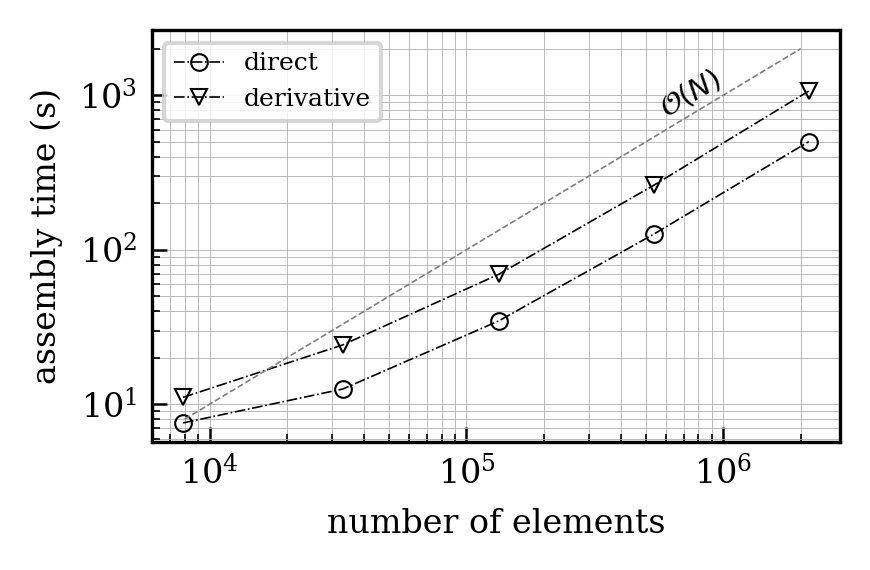

In [5]:
fig = plt.figure(figsize=(3,2))
ax = fig.add_subplot(111)

ax.loglog(direct_df.index, direct_df.t_total_assembly, ls='dashdot', marker='o', fillstyle='none', label='direct', color='black')
ax.loglog(derivative_df.index, derivative_df.t_total_assembly, ls='dashdot', marker='v', fillstyle='none', label='derivative', color='black')

_x = [0.8*1e4, 2e6]
_y = 100 * np.array((0.08, 20))
ax.plot(_x, _y, color='#7f7f7f', linestyle='--')
text_loc = np.array((_x[1], _y[1]*1.2)) * 0.3
ax.text(text_loc[0], text_loc[1],r'$\mathcal{O}(N)$', fontsize=7, rotation=30,rotation_mode='anchor');

ax.set_xlabel('number of elements')
ax.set_ylabel('assembly time (s)')
ax.legend()
ax.grid(which='both')

plt.tight_layout()
# plt.savefig('../../tex/figs/1A7M_assembly_time.pdf', dpi=300);

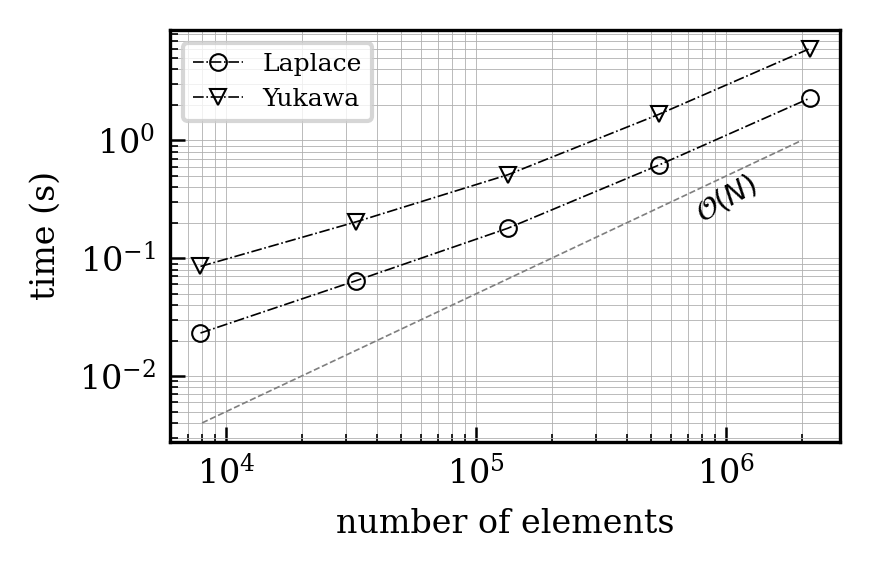

In [6]:
fig = plt.figure(figsize=(3,2))
ax = fig.add_subplot(111)

ax.loglog(direct_df.index, direct_df.t_avg_laplace, ls='dashdot', marker='o', fillstyle='none', label='Laplace', color='black')
ax.loglog(direct_df.index, direct_df.t_avg_helmholtz, ls='dashdot', marker='v', fillstyle='none', label='Yukawa', color='black')

_x = [0.8*1e4, 2e6]
_y = 0.05 * np.array((0.08, 20))
ax.legend()
ax.plot(_x, _y, color='#7f7f7f', linestyle='--')
text_loc = np.array((_x[1], _y[1]*0.5)) * 0.4
ax.text(text_loc[0], text_loc[1],r'$\mathcal{O}(N)$', fontsize=7, rotation=30,rotation_mode='anchor');
ax.grid(which='both')
ax.set_xlabel('number of elements')
ax.set_ylabel('time (s)')

plt.tight_layout()
# plt.savefig('../../tex/figs/1A7M_fmm.pdf', dpi=300);

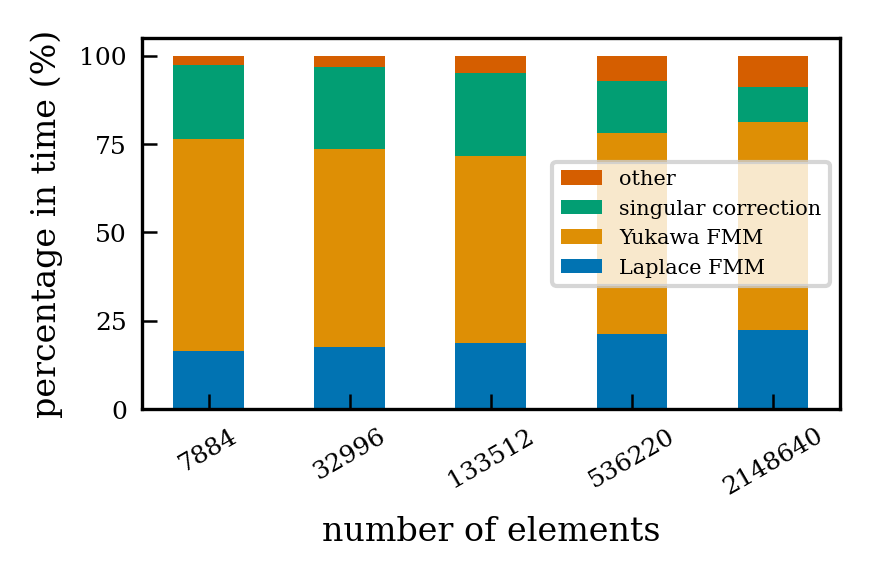

In [7]:
prop_laplace = direct_df.t_laplace / direct_df.t_total_gmres * 100
prop_helmholtz = direct_df.t_helmholtz / direct_df.t_total_gmres * 100
prop_correction = direct_df.t_singular_correction / direct_df.t_total_gmres * 100
prop_other = direct_df.t_gmres_other / direct_df.t_total_gmres * 100

width = 0.5
r = np.arange(direct_df.shape[0])
fig = plt.figure(figsize=(3,2))
ax1 = fig.add_subplot(111)
ax1.set_prop_cycle(cb)
ax1.bar(r, prop_laplace, width=width, label='Laplace FMM')
ax1.bar(r, prop_helmholtz, bottom=prop_laplace, width=width, label='Yukawa FMM')
ax1.bar(r, prop_correction, bottom=prop_laplace+prop_helmholtz, width=width, label='singular correction')
ax1.bar(r, prop_other, bottom=prop_laplace+prop_helmholtz+prop_correction, width=width, label='other')

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1], loc='best', fontsize=5)
ax1.set_xlabel('number of elements')
ax1.set_ylabel('percentage in time (%)')

plt.yticks(fontsize=6)
plt.xticks(r, direct_df.index, rotation=30, fontsize=6)
plt.tight_layout()
# plt.savefig('../../tex/figs/1A7M_gmres_direct.pdf', dpi=300);

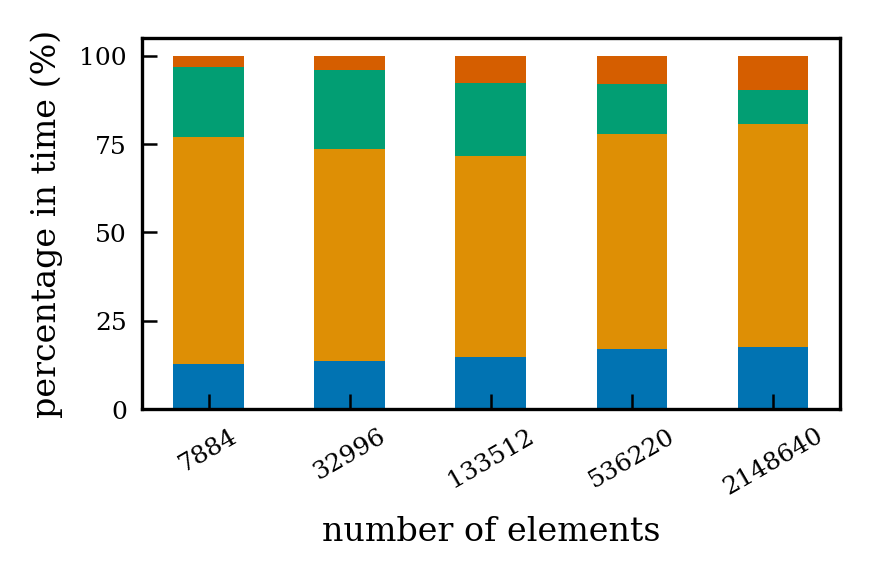

In [8]:
prop_laplace = derivative_df.t_laplace / derivative_df.t_total_gmres * 100
prop_helmholtz = derivative_df.t_helmholtz / derivative_df.t_total_gmres * 100
prop_correction = derivative_df.t_singular_correction / derivative_df.t_total_gmres * 100
prop_other = derivative_df.t_gmres_other / derivative_df.t_total_gmres * 100

fig = plt.figure(figsize=(3,2))
ax2 = fig.add_subplot(111)
ax2.set_prop_cycle(cb)
ax2.bar(r, prop_laplace, width=width, label='Laplace FMM')
ax2.bar(r, prop_helmholtz, bottom=prop_laplace, width=width, label='Yukawa FMM')
ax2.bar(r, prop_correction, bottom=prop_laplace+prop_helmholtz, width=width, label='singular correction')
ax2.bar(r, prop_other, bottom=prop_laplace+prop_helmholtz+prop_correction, width=width, label='other')

ax2.set_xlabel('number of elements')
ax2.set_ylabel('percentage in time (%)')

plt.yticks(fontsize=6)
plt.xticks(r, direct_df.index, rotation=30, fontsize=6)

plt.tight_layout()
plt.savefig('../../tex/figs/1A7M_gmres_derivative.pdf', dpi=300);

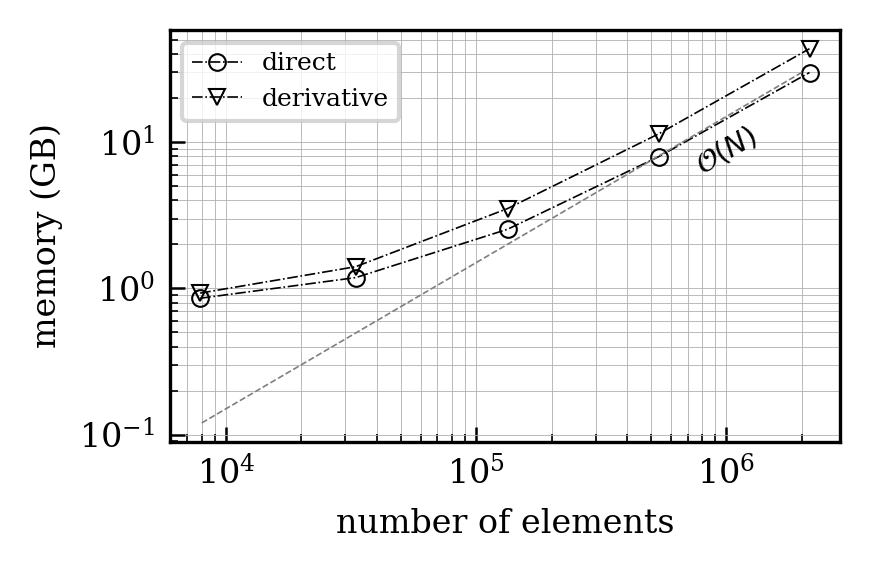

In [9]:
fig = plt.figure(figsize=(3,2))
ax = fig.add_subplot(111)

ax.loglog(direct_df.index, direct_df['memory [GB]'], ls='dashdot', marker='o', fillstyle='none', label='direct', color='black')
ax.loglog(derivative_df.index, derivative_df['memory [GB]'], ls='dashdot', marker='v', fillstyle='none', label='derivative', color='black')
ax.grid(which='both')
_x = [0.8*1e4, 2e6]
_y = 1.5 * np.array((0.08, 20))
ax.legend(fontsize=6)
ax.plot(_x, _y, color='#7f7f7f', linestyle='--')
text_loc = np.array((_x[1], _y[1]*0.5)) * 0.4
ax.text(text_loc[0], text_loc[1],r'$\mathcal{O}(N)$', fontsize=7, rotation=30,rotation_mode='anchor');
ax.set_xlabel('number of elements')
ax.set_ylabel('memory (GB)')

plt.tight_layout()
# plt.savefig('../../tex/figs/1A7M_memory.pdf', dpi=300);